# Математическая и прикладная статистика
## Лабораторная работа
## Белоброцкий Денис Витальевич, Магистратура, 1 курс
### Вариант
Количество гласных букв = 10  
Количество согласных букв = 16  
Вариант = 06
### Исходный код
https://github.com/DenisBelobrotski/AppliedStatisticsLab


## Задание 1


### Модули


In [1]:
import math
import numpy as np
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
# %matplotlib inline


### Чтение данных (data_1_var_06.txt)


In [2]:
data_file_name = "data_1_var_06.txt"

def parse_data(file_name):
    result_data = []
    result_data_len = 0
    all_data_parsed = False
    
    with open(file_name, "r") as file:
        numbers = file.read().split(",")
        numbers_len = len(numbers)
        for current in numbers:
            result_data.append(float(current.strip()))
        result_data_len = len(result_data)
        all_data_parsed = (numbers_len == result_data_len)
        
    return result_data, result_data_len, all_data_parsed
        
data, dataLen, allDataParsed = parse_data(data_file_name)

print("Parsed numbers count = " + str(dataLen))
print("Is all data parsed = " + str(allDataParsed))
sortedData = sorted(data)
    

Parsed numbers count = 345
Is all data parsed = True


### а) Выборочное среднее
$X_1, ..., X_n$ - выборка  
$\bar{X} = \frac{1}{n} \sum_{i = 1}^n X_i$


In [3]:
def calc_sample_mean(in_data):
    in_data_len = len(in_data)
    mean_sum = 0.0
    for number in in_data:
        mean_sum += number
    return mean_sum / in_data_len

sampleMean = calc_sample_mean(data)
print("Sample mean = " + str(sampleMean))


Sample mean = 3.5859199999999984


### б) Выборочная дисперсия
$S_n^2 = \frac{1}{n} \sum_{i = 1}^n (X_i - \bar{X}^2)$


In [4]:
def calc_variance_sum(in_data, mean):
    variance_sum = 0.0
    for number in in_data:
        variance_sum += (number - mean)**2
    return variance_sum

def calc_sample_variance(in_data, mean):
    in_data_len = len(in_data)
    return calc_variance_sum(in_data, mean) / in_data_len

sampleVariance = calc_sample_variance(data, sampleMean)
print("Sample variance = " + str(sampleVariance))


Sample variance = 1.2073530875130443


### в) Исправленная дисперсия
$S^2 = \frac{1}{n - 1} \sum_{i = 1}^n (X_i - \bar{X}^2)$


In [5]:
def calc_unbiased_sample_variance(in_data, mean):
    in_data_len = len(in_data)
    return calc_variance_sum(in_data, mean) / (in_data_len - 1)

unbiasedSampleVariance = calc_unbiased_sample_variance(data, sampleMean)
print("Unbiased sample variance = " + str(unbiasedSampleVariance))


Unbiased sample variance = 1.210862834860466


### г) Размах выборки
**Размах выборки** — разность между наибольшим и наименьшим значениями результатов наблюдений.


In [6]:
dataMin = sortedData[0]
dataMax = sortedData[-1]
dataRange = dataMax - dataMin
print("Min = " + str(dataMin))
print("Max = " + str(dataMax))
print("Range = " + str(dataRange))


Min = 0.6819
Max = 6.5951
Range = 5.913200000000001


### д) Медиана
**Медиана** — это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него.

In [7]:
median = sortedData[dataLen // 2]
if dataLen % 2 == 0:
    median += sortedData[dataLen // 2 - 1]
    median /= 2
    
print("Median = " + str(median))


Median = 3.5788


### е) Квартили
**Квантиль** — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.  
0,25-квантиль называется **первым (нижним) квартилем**.  
0,5-квантиль называется **вторым квартилем (медианой)**.  
0,75-квантиль называется **третьим (верхним) квартилем**.  

In [8]:
lowerQuartile = sortedData[dataLen // 4]
upperQuartile = sortedData[3 * dataLen // 4]

print("Q1 = " + str(lowerQuartile))
print("Q2 = " + str(median))
print("Q3 = " + str(upperQuartile))


Q1 = 2.8036
Q2 = 3.5788
Q3 = 4.3214


### ж) Выборочная квантиль уровня 1/3


In [9]:
quantile_1_3 = sortedData[dataLen // 3]

print("Q = " + str(quantile_1_3))


Q = 3.0461


### з) Гистограмма, полигон частот, плотность нормального распределения.  
**Гистограмма** — это функция, приближающая плотность вероятности некоторого распределения, построенная на основе выборки из него.  
**Полигон частот** — ломаная, соединяющая точки, соответствующие срединным значениям интервалов группировки (разбиений гистограммы) и частотам этих интервалов.  
**Функция плотности нормального распределения**:  
$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$,  
где $\mu$ - математическое ожидание, $\sigma$ - среднеквадратическое отклонение ($\sigma^2$ - дисперсия).  
PDF - Probability Density Function (Функция плотности распределения).  


mu =  3.5859199999999984
sigma =  1.1003921277710351
hist bins count =  20


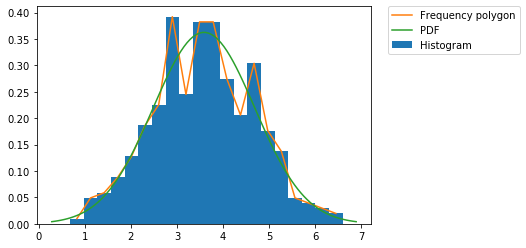

In [10]:
def norm_pdf(x, mu, sigma):
    return (1.0 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma)**2)

def norm_pdf_list(x, mu, sigma):
    result = x.copy()
    for i in range(len(x)):
        result[i] = norm_pdf(result[i], mu, sigma)

    return result

def draw_pdf(hist_bins_count, mu, sigma):
    n, bins, patches = plt.hist(data, hist_bins_count, density=True, label="Histogram")
    bins = np.delete(bins, -1)
    
    for i in range(hist_bins_count):
        bins[i] += patches[i].get_width() / 2
        
    plt.plot(bins, n, label="Frequency polygon")
    
    nodes_count = 100
    nodes = np.linspace(mu - 3 * sigma, mu + 3 * sigma, nodes_count)
    plt.plot(nodes, norm_pdf_list(nodes, mu, sigma), label="PDF")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)
    
    print("mu = ", str(mu))
    print("sigma = ", str(sigma))
    print("hist bins count = ", str(hist_bins_count))
    
draw_pdf(20, sampleMean, math.sqrt(unbiasedSampleVariance))


### и) Эмпирическая функция распределения и функция распределения нормального закона  
**Функцией распределения** случайной величины $X$ называется функция $F_X(x):R \rightarrow [0, 1]$, задаваемая формулой:  
$F_X(x) = P(X < x)$.  
Функция распределения нормального закона:  
$F(x) = \frac{1}{2} [1 + erf(\frac{x - \mu}{\sigma \sqrt{2}})]$,  
где $erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}dt$.  
CDF - Cumulative distribution function (Теоритическая функция распределения)  
EDF - Empirical distribution function (Эмпирическая функция распределения)  


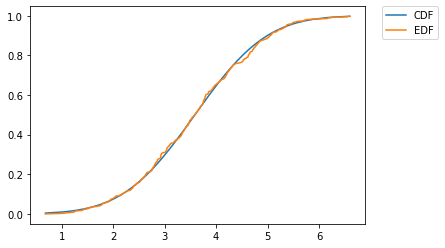

In [11]:
def norm_cdf(x, mu, sigma):
    return 0.5 * (1 + math.erf((x - mu) / (sigma * 1.4142)))

def norm_cdf_list(in_data, mu, sigma):
    out_data = in_data.copy()
    for i in range(len(out_data)):
        out_data[i] = norm_cdf(out_data[i], mu, sigma)
    return out_data

def edf(in_data):
    out_data = in_data.copy()
    out_data_len = len(out_data)
    for i in range(out_data_len):
        out_data[i] = i / out_data_len
    return out_data

def draw_cdf(mu, sigma):
    plt.plot(sortedData, norm_cdf_list(sortedData, mu, sigma), label="CDF")
    plt.plot(sortedData, edf(sortedData), label="EDF")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)

draw_cdf(sampleMean, math.sqrt(unbiasedSampleVariance))


### к) Доверительные интервалы для среднего и дисперсии с вероятностью 0.99  
$P(\bar{X} - t_{1 - \frac{\alpha}{2}, n - 1} \frac{S}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{1 - \frac{\alpha}{2}, n - 1} \frac{S}{\sqrt{n}}) = 1 - \alpha$,  
где $\alpha$ - вероятность попадания среднего в интервал, $S$ - несмещённое выборочное стандартное отклонение, $t_{\alpha, n - 1}$ - $\alpha$-квантили распределения Стьюдента с $n - 1$ степенями свободы.  
$P(\frac{(n - 1)S^2}{\chi_{\frac{1 + \alpha}{2}, n - 1}} \leq \sigma^2 \leq \frac{(n - 1)S^2}{\chi_{\frac{1 - \alpha}{2}, n - 1}}) = \alpha$,  
где $\alpha$ - вероятность попадания дисперсии в интервал, $S^2$ - несмещённая выборочная дисперсия, $\chi_{\alpha, n - 1}^2$ - $\alpha$-квантили распределения хи-квадрат с $n - 1$ степенями свободы.  


In [12]:
def confidence_interval_mean(mean, variance, data_len, probability):
    bias = math.sqrt(variance / (data_len - 1)) * stats.t.ppf(1 - probability / 2, data_len - 1)
    return mean - bias, mean + bias

def confidence_interval_variance(variance, data_len, probability):
    lower_bound = (data_len - 1) * variance / stats.chi2.ppf((1 + probability) / 2, data_len - 1)
    upper_bound = (data_len - 1) * variance / stats.chi2.ppf((1 - probability) / 2, data_len - 1)
    return lower_bound, upper_bound

print("Mean confidence interval = " + str(confidence_interval_mean(sampleMean, unbiasedSampleVariance, dataLen, 0.99)))
print("Sample mean = " + str(sampleMean))
print()
print("Variance confidence interval = " + str(confidence_interval_variance(unbiasedSampleVariance, dataLen, 0.99)))
print("Unbiased sample variance = " + str(unbiasedSampleVariance))


Mean confidence interval = (3.5851758590018594, 3.5866641409981375)
Sample mean = 3.5859199999999984

Variance confidence interval = (1.0029449329842604, 1.4865973537588315)
Unbiased sample variance = 1.210862834860466


## Задание 2


In [13]:
significance = 0.05
test_hists_bins_count = 20
kolmogorov_distribution_quantile = 1.36
a1_distribution_quantile = 0.46
a2_distribution_quantile = 2.49
chi2_distribution_quantile = stats.chi2.ppf(1 - significance, test_hists_bins_count - 1)
norm_distribution_quantile = stats.norm.ppf(1 - significance)


### а) При помощи критерия Колмогорова проверить гипотезу о том, что данные имеют нормальный закон распределения со средним 10 и дисперсией 5.5. Уровень занчимости 0.05.
Данный критерий позволяет осуществить проверку гипотез в условиях, когда функция распределения $ F_{0}(x) $ модельного закона известна полностью, то есть не зависит от неизвестных параметров.  
Статистика $D = \sup_{x \in R} \mid F_{0}(x) - F_{n}(x) \mid \in [0, 1]$
называется расстоянием Колмогорова между $ F_{0}(x) $ и $ F_{n}(x) $.  
Принятие гипотезы происходит следующим образом: 
$
	\begin{cases}
			H_{0},\; \sqrt[]{n} D < \Delta, \\
			H_{1},\; \sqrt[]{n} D \geq \Delta,
	\end{cases} 
$  
где $\Delta$ - $(1 - \alpha)$-квантиль распределения Колмогорова, $\alpha$ - уровень значимости.

In [14]:
def kolmogorov_test_normal(sorted_data, mean, variance, quantile):
    data_len = len(sorted_data)
    cdf_result = norm_cdf_list(sortedData, mean, math.sqrt(variance))
    edf_result = edf(sortedData)
    
    max_distance = 0
    for i in range(data_len):
        # max_distance = max(max_distance, math.fabs(cdf_result[i] - edf_result[i]))
        max_distance = max(max_distance, math.fabs(cdf_result[i] - (i + 1) / data_len))
        
    result_statistic = math.sqrt(data_len) * max_distance
    return result_statistic, (result_statistic < quantile)
    
kolmogorov_test_normal_statistic, kolmogorov_test_normal_passed = \
    kolmogorov_test_normal(sortedData, 10.0, 5.5, kolmogorov_distribution_quantile)
print("Kolmogorov test:")
print("statistic = ", str(kolmogorov_test_normal_statistic))
print("quantile = ", str(kolmogorov_distribution_quantile))
print("passed = ", str(kolmogorov_test_normal_passed))


Kolmogorov test:
statistic =  17.604856029131053
quantile =  1.36
passed =  False


### б) При помощи критерия Крамера-Мизеса проверить гипотезу о том, что данные имеют нормальный закон распределения со средним 10 и дисперсией 5.5. Уровень занчимости 0.05.
Статистика критерия омега-квадрат:  
$\omega_n^2(\psi) = \int_{-\infty}^{+\infty}(\hat{F}_n(x) - F(x))^2 \psi(F(x)) dF(x)$.  
Для критерия Крамера-Мизеса $\psi(y) = 1$.  
Критерий:  
$lim_{n\to\infty} P(n\omega_n^2(\psi) \leq x) = A(x)$.  
Разложения $A(x)$ известны. Квантили можно взять из таблицы.  
Формула для вычисления:
$n\omega_n^2(\psi) = \frac{1}{12n} + \sum_{i = 1}{n}(F(x_i) - \frac{2i - 1}{2n})^2$.  



In [15]:
def cramer_mises_test_normal(sorted_data, mean, variance, quntile):
    data_len = len(sorted_data)
    cdf_result = norm_cdf_list(sortedData, mean, math.sqrt(variance))
    
    result_statistic = 1 / (12 * data_len)
    for i in range(data_len):
        result_statistic += (cdf_result[i] - (2 * i + 1)/(2 * data_len))**2
    
    return result_statistic, (result_statistic < quntile)

cramer_mises_test_normal_statistic, cramer_mises_test_normal_passed = \
    cramer_mises_test_normal(sortedData, 10.0, 5.5, a1_distribution_quantile)
print("Cramer-Mises test:")
print("statistic = ", str(cramer_mises_test_normal_statistic))
print("quantile = ", str(a1_distribution_quantile))
print("passed = ", str(cramer_mises_test_normal_passed))


Cramer-Mises test:
statistic =  111.35222279248605
quantile =  0.46
passed =  False


### в) При помощи критерия Андерсона-Дарлинга проверить гипотезу о том, что данные имеют нормальный закон распределения со средним 10 и дисперсией 5.5. Уровень занчимости 0.05.
Статистикой этого критерия является статистика критерия омега-квадрат с функцией $\psi(y) = \frac{1}{y(1 - y)}$.  
Формула для вычисления:  
$n\omega_n^2(\psi) = -n - 2 \sum_{i = 1}^n (\frac{2i - 1}{2n} \ln{F(x_i)} = (1 - \frac{2i - 1}{2n}) \ln{(1 - F(x_i))})$


In [16]:
def anderson_darling_test_normal(sorted_data, mean, variance, quntile):
    data_len = len(sorted_data)
    cdf_result = norm_cdf_list(sortedData, mean, math.sqrt(variance))
    
    result_statistic = -data_len
    for i in range(data_len):
        coef = (2 * i + 1)/(2 * data_len)
        result_statistic += -2 * (coef * math.log(cdf_result[i]) + (1 - coef) * math.log(1 - cdf_result[i]))
    
    return result_statistic, (result_statistic < quntile)

anderson_darling_test_normal_statistic, anderson_darling_test_normal_passed = \
    anderson_darling_test_normal(sortedData, 10.0, 5.5, a2_distribution_quantile)
print("Anderson-Darling test:")
print("statistic = ", str(anderson_darling_test_normal_statistic))
print("quantile = ", str(a2_distribution_quantile))
print("passed = ", str(anderson_darling_test_normal_passed))


Anderson-Darling test:
statistic =  1402.6543578852445
quantile =  2.49
passed =  False


### Чтение данных второй выборки (data_1_var_07.txt)


In [17]:
data2_file_name = "data_1_var_07.txt"
        
data2, data2Len, allData2Parsed = parse_data(data2_file_name)

print("Parsed numbers count = " + str(data2Len))
print("Is all data parsed = " + str(allData2Parsed))
sortedData2 = sorted(data2)


Parsed numbers count = 349
Is all data parsed = True


### г) При помощи критерия хи-квадрат проверить гипотезу, что вторая выборка имеет нормальное распределение. Уровень значимости 0.05.


Pearson test:
hist intervals =  20
statistic =  30.06662489471957
quantile =  30.14352720564616
passed =  True


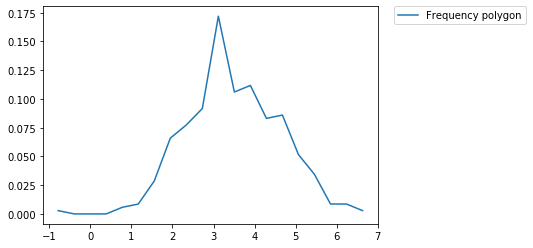

In [18]:
def create_hist(in_data, intervals_count, lower_bound, upper_bound, normalized = False):
    out_hist = [0] * intervals_count
    intervals_positions = [0] * intervals_count
    hist_step = (upper_bound - lower_bound) / intervals_count
    cur_border = lower_bound + hist_step
    cur_interval_index = 0
    in_data_len = len(in_data)
    
    for i in range(intervals_count):
        intervals_positions[i] = lower_bound + hist_step * i

    for current_number in in_data:
        if current_number < cur_border:
            out_hist[cur_interval_index] += 1
        elif cur_interval_index < intervals_count - 1:
            cur_interval_index += 1
            cur_border += hist_step
    
    if normalized:
        for i in range(intervals_count):
            out_hist[i] /= in_data_len
            
    return out_hist, intervals_positions

def pearson_test_normal(in_data, bins_count, quantile):
    mean = calc_sample_mean(in_data)
    sqrd_variance = math.sqrt(calc_unbiased_sample_variance(in_data, mean))
    in_data_len = len(in_data)
    in_data_hist, _ = create_hist(in_data, bins_count, in_data[0], in_data[-1], False)
    step = (in_data[-1] - in_data[0]) / bins_count
    cur_border = in_data[0]
    chi_sum = 0
    
    for i in range(bins_count):
        prev_border = cur_border
        cur_border = in_data[0] + (i + 1) * step
        expected_count = in_data_len * (norm_cdf(cur_border, mean, sqrd_variance) - norm_cdf(prev_border, mean, sqrd_variance))
        chi_sum += (in_data_hist[i] - expected_count)**2 / expected_count
        
    return chi_sum, (chi_sum < quantile)
    
hist, interval_positions = create_hist(sortedData2, test_hists_bins_count, sortedData2[0], sortedData2[-1], True)
plt.plot(interval_positions, hist, label="Frequency polygon")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)
    
pearson_test_normal_statistic, pearson_test_normal_passed = \
    pearson_test_normal(sortedData2, test_hists_bins_count, chi2_distribution_quantile)
print("Pearson test:")
print("hist intervals = ", str(test_hists_bins_count))
print("statistic = ", str(pearson_test_normal_statistic))
print("quantile = ", str(chi2_distribution_quantile))
print("passed = ", str(pearson_test_normal_passed))


### Сравнение эмпирических функций распределения двух выборок


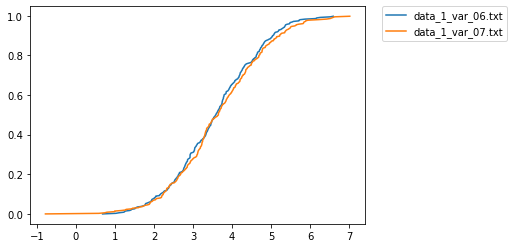

In [19]:
edf_1 = edf(sortedData)
edf_2 = edf(sortedData2)

plt.plot(sortedData, edf_1, label="data_1_var_06.txt")
plt.plot(sortedData2, edf_2, label="data_1_var_07.txt")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)


### д) Проверить гипотезу однородности выборок при помощи критерия Колмогорова-Смирнова. Уровень значимости 0.05.


In [20]:
def apply_edf(in_data, in_data_edf, argument):
    in_data_len = len(in_data)
    result = 0
    
    if argument > in_data[-1]:
        result = 1
    elif argument > in_data[0]:
        for i in range(in_data_len):
            if argument <= in_data[i]:
                percentage = (argument - in_data[i - 1]) / (in_data[i] - in_data[i - 1])
                result = in_data_edf[i - 1] + percentage * (in_data_edf[i] - in_data_edf[i - 1])
                break
    else:
        result = 0
        
    return result

def calc_smirnov_test_distance(in_data_1, in_data_2, in_data_2_edf):
    in_data_1_len = len(in_data_1)
    distance = 0
    
    for i in range(in_data_1_len):
        distance = max(distance, math.fabs(
            (i + 1) / in_data_1_len - 
            apply_edf(in_data_2, in_data_2_edf, in_data_1[i])))
    
    return distance

def smirnov_test(in_data_1, in_data_2, quantile):
    in_data_1_len = len(in_data_1)
    in_data_2_len = len(in_data_2)
    in_edf_1 = edf(in_data_1)
    in_edf_2 = edf(in_data_2)
    
    distance_positive = calc_smirnov_test_distance(in_data_1, in_data_2, in_edf_2)
    distance_negative = calc_smirnov_test_distance(in_data_2, in_data_1, in_edf_1)
    distance = max(distance_positive, distance_negative)
    statistic_coef = math.sqrt(in_data_1_len * in_data_2_len / (in_data_1_len + in_data_2_len))
    statistic = statistic_coef * distance
    
    return statistic, (statistic < quantile)

smirnov_test_statistic, smirnov_test_passed = \
    smirnov_test(sortedData, sortedData2, kolmogorov_distribution_quantile)
print("Smirnov test:")
print("statistic = ", str(smirnov_test_statistic))
print("quantile = ", str(kolmogorov_distribution_quantile))
print("passed = ", str(smirnov_test_passed))


Smirnov test:
statistic =  0.7671199254742549
quantile =  1.36
passed =  True


### е) Проверить гипотезу однородности выборок при помощи критерия Розенблатта. Уровень значимости 0.05.


In [21]:
def calc_ranks(in_data):
    out_data = in_data.copy()
    out_data_len = len(out_data)
    for i in range(out_data_len):
        out_data[i] = i
    return out_data

def rosenblatt_test(in_data_1, in_data_2, quantile):
    in_data_1_len = len(in_data_1)
    in_data_2_len = len(in_data_2)
    ranks_1 = calc_ranks(in_data_1)
    ranks_2 = calc_ranks(in_data_2)
    
    sum_1 = 0
    for i in range(in_data_1_len):
        sum_1 += (ranks_1[i] - (i + 1))**2
    sum_1 /= in_data_2_len

    sum_2 = 0
    for j in range(in_data_2_len):
        sum_2 += (ranks_2[j] - (j + 1))**2
    sum_2 /= in_data_1_len

    squared_omega = 1. / (in_data_1_len * in_data_2_len) * ((1. / 6) + sum_1 + sum_2) - (2. / 3)
    statistic = (in_data_1_len * in_data_2_len) / (in_data_1_len + in_data_2_len) * squared_omega

    mean = 1. / 6 * (1 + 1 / (in_data_1_len + in_data_2_len))
    variance = 1. / 45 * (1 + 1 / (in_data_1_len + in_data_2_len)) * (1 + 1 / (in_data_1_len + in_data_2_len) - 3. / 4 * (1 / in_data_1_len + 1 / in_data_2_len))

    corrected_statistic = (statistic - mean) / math.sqrt(45. * variance) + 1. / 6
    
    return corrected_statistic, (corrected_statistic < quantile)
    
# https://en.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93von_Mises_criterion
def rosenblatt_test_2(in_data_1, in_data_2, quantile):
    in_data_1_len = len(in_data_1)
    in_data_2_len = len(in_data_2)
    ranks_1 = calc_ranks(in_data_1)
    ranks_2 = calc_ranks(in_data_2)
    
    sum_1 = 0
    for i in range(in_data_1_len):
        sum_1 += (ranks_1[i] - (i + 1))**2

    sum_2 = 0
    for j in range(in_data_2_len):
        sum_2 += (ranks_2[j] - (j + 1))**2

    n = in_data_1_len
    m = in_data_2_len

    u = n * sum_1 + m * sum_2

    t = u / (n * m * (n + m)) - (4 * m * n - 1) / (6 * (m + n))
    
    return t, (t < quantile)

rosenblatt_test_statistic, rosenblatt_test_passed = \
    rosenblatt_test(sortedData, sortedData2, a2_distribution_quantile)
print("Rosenblatt test:")
print("statistic = ", str(rosenblatt_test_statistic))
print("quantile = ", str(a2_distribution_quantile))
print("passed = ", str(rosenblatt_test_passed))


Rosenblatt test:
statistic =  -115.74373038178214
quantile =  2.49
passed =  True


### ж) Проверить гипотезу однородности выборок при помощи критерия Уилкоксона (Манна-Уитни). Уровень значимости 0.05.


In [22]:
def wilcoxon_mann_whitney_test(in_data_1, in_data_2, quantile):
    n = len(in_data_1)
    m = len(in_data_2)
    
    result_sum = 0
    for i in range(n):
        for j in range(m):
            if in_data_1[i] < in_data_2[j]:
                result_sum += 1
                    
    mean = (n * m) / 2
    variance = n * m * (n + m + 1) / 12
    
    statistic = (result_sum - mean) / math.sqrt(variance)
    
    return statistic, (statistic < quantile)
    
wilcoxon_mann_whitney_test_statistic, wilcoxon_mann_whitney_test_passed = \
    wilcoxon_mann_whitney_test(sortedData, sortedData2, norm_distribution_quantile)
print("Wilcoxon-Mann-Whitney test:")
print("statistic = ", str(wilcoxon_mann_whitney_test_statistic))
print("quantile = ", str(norm_distribution_quantile))
print("passed = ", str(wilcoxon_mann_whitney_test_passed))


Wilcoxon-Mann-Whitney test:
statistic =  0.8026188969873727
quantile =  1.6448536269514722
passed =  True


In [23]:
def pearson_test_2_experiments(in_data_1, in_data_2, bins_count, quantile):
    in_data_1_len = len(in_data_1)
    in_data_2_len = len(in_data_2)
    in_data_len = in_data_1_len + in_data_2_len
    
    lower_bound = min(in_data_1[0], in_data_2[0])
    upper_bound = max(in_data_1[-1], in_data_2[-1])
    
    hist_1, _ = create_hist(in_data_1, bins_count, lower_bound, upper_bound, False)
    hist_2, _ = create_hist(in_data_2, bins_count, lower_bound, upper_bound, False)
    
    sum_1 = 0
    for j in range(bins_count):
        frequency = (hist_1[j] + hist_2[j]) / in_data_len
        if frequency < 1.0e-05:
            continue
        sum_1 += (hist_1[j] - in_data_1_len * frequency)**2 / (in_data_1_len * frequency)
    
    sum_2 = 0
    for j in range(bins_count):
        frequency = (hist_1[j] + hist_2[j]) / in_data_len
        if frequency < 1.0e-05:
            continue
        sum_2 += (hist_2[j] - in_data_2_len * frequency)**2 / (in_data_2_len * frequency)
        
    statistic = sum_1 + sum_2
    
    return statistic, (statistic < quantile)
    
pearson_test_2_experiments_statistic, pearson_test_2_experiments_passed = \
    pearson_test_2_experiments(sortedData, sortedData2, test_hists_bins_count, chi2_distribution_quantile)
print("Pearson test:")
print("statistic = ", str(pearson_test_2_experiments_statistic))
print("quantile = ", str(chi2_distribution_quantile))
print("passed = ", str(pearson_test_2_experiments_passed))


Pearson test:
statistic =  18.04004731707197
quantile =  30.14352720564616
passed =  True
